In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [3]:
train_transaction =  dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/train_transaction.csv").to_pandas()
train_identity = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/train_identity.csv").to_pandas()

In [4]:
trainset = pd.merge(train_transaction, train_identity, on='TransactionID', how='outer')
%reset_selective -f train_transaction
%reset_selective -f train_identity

In [5]:
trainset = trainset[["TransactionID","DeviceType","DeviceInfo","TransactionDT","TransactionAmt","ProductCD","card4","card6","P_emaildomain","R_emaildomain","addr1","addr2","dist1","dist2","isFraud"]]

In [6]:
trainset.iloc[:5]

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud
0,2987000,NaN,NaN,86400,68.5,W,discover,credit,,,315.0,87.0,19.0,NaN,False
1,2987001,NaN,NaN,86401,29.0,W,mastercard,credit,gmail.com,,325.0,87.0,NaN,NaN,False
2,2987002,NaN,NaN,86469,59.0,W,visa,debit,outlook.com,,330.0,87.0,287.0,NaN,False
3,2987003,NaN,NaN,86499,50.0,W,mastercard,debit,yahoo.com,,476.0,87.0,NaN,NaN,False
4,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,86506,50.0,H,mastercard,credit,gmail.com,,420.0,87.0,NaN,NaN,False


In [7]:
trainset.groupby('isFraud').agg([np.mean, np.median])

TransactionID          TransactionDT          TransactionAmt         \
                 mean   median          mean   median           mean median   
isFraud                                                                       
False    3.281810e+06  3281808  7.360791e+06  7271678     134.511665   68.5   
True     3.294952e+06  3291934  7.690033e+06  7575230     149.244779   75.0   

              addr1             addr2              dist1              dist2  \
               mean median       mean median        mean median        mean   
isFraud                                                                       
False    290.643341  299.0  86.813620   87.0  117.360098    8.0  235.199758   
True     294.317134  299.0  86.286024   87.0  174.588854   10.0  201.472259   

                
        median  
isFraud         
False     36.0  
True      49.0

In [8]:
trainset['TransactionDT_day'] = trainset['TransactionDT'].apply(lambda x: int(x/86400))
trainset['TransactionDT_hour'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24))
trainset['TransactionDT_min'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24%1*60))
trainset['TransactionDT_sec'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24%1*60%1*60))

Question 1
----------

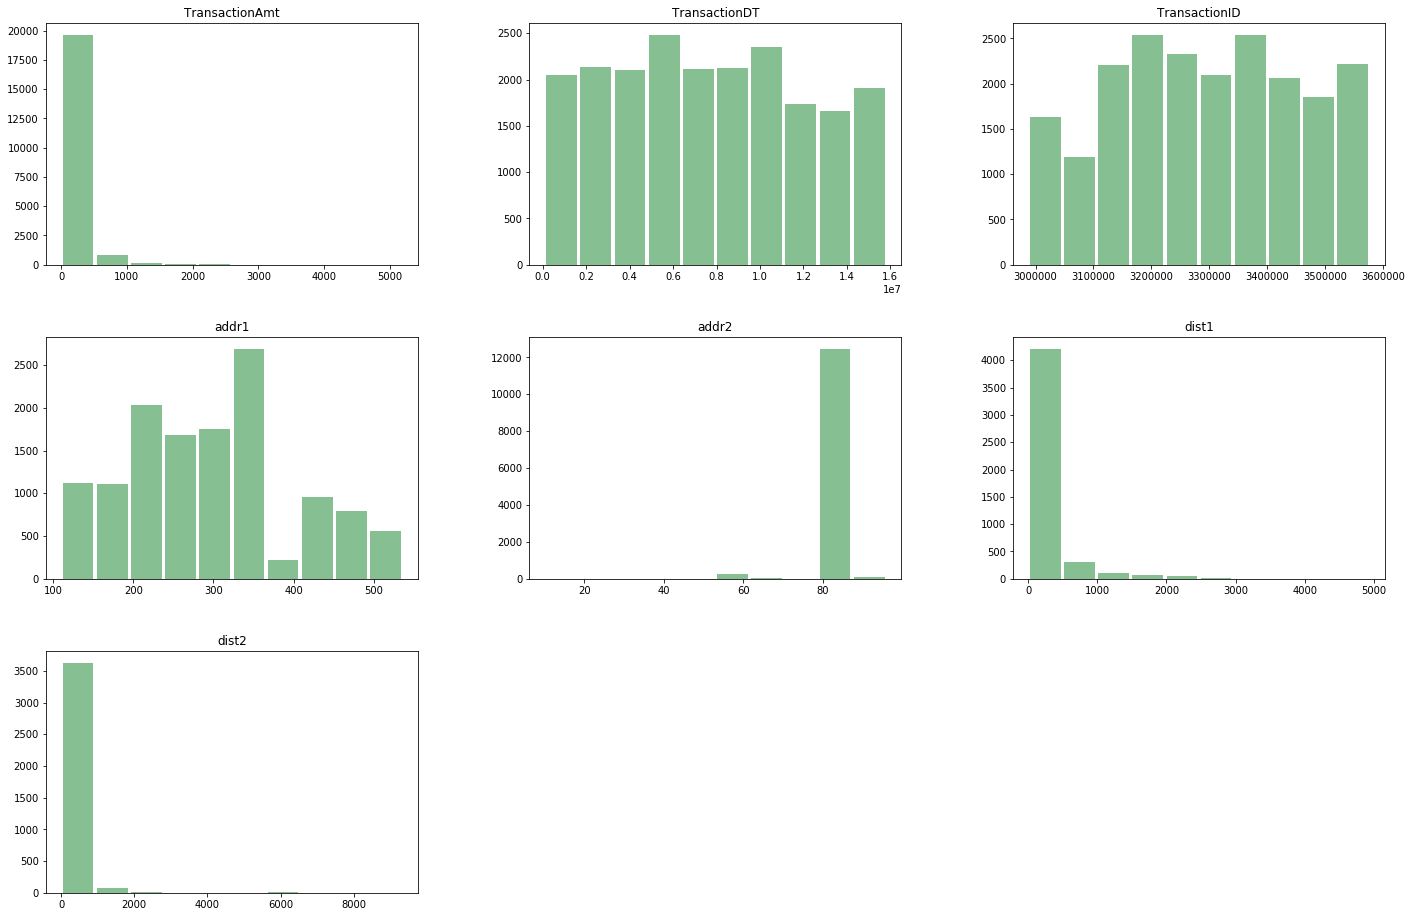

In [9]:
hist0 = trainset[trainset['isFraud'] == True][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].hist(grid=False, figsize=(24,16), color='#86bf91', zorder=2, rwidth=0.9)

In [10]:
trainset[trainset['isFraud'] == True][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].describe()

,TransactionID,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,2.066300e+04,2.066300e+04,20663.000000,12922.000000,12922.000000,4755.000000,3731.000000
mean,3.294952e+06,7.690033e+06,149.244779,294.317134,86.286024,174.588854,201.472259
std,1.620403e+05,4.416551e+06,232.212163,103.584955,4.936238,424.232313,451.589576
min,2.987203e+06,8.976000e+04,0.292000,110.000000,10.000000,0.000000,0.000000
25%,3.167366e+06,3.965858e+06,35.044000,204.000000,87.000000,3.000000,7.000000
50%,3.291934e+06,7.575230e+06,75.000000,299.000000,87.000000,10.000000,49.000000
75%,3.428646e+06,1.121743e+07,161.000000,330.000000,87.000000,85.500000,233.000000
max,3.577526e+06,1.581088e+07,5191.000000,536.000000,96.000000,4942.000000,9337.000000


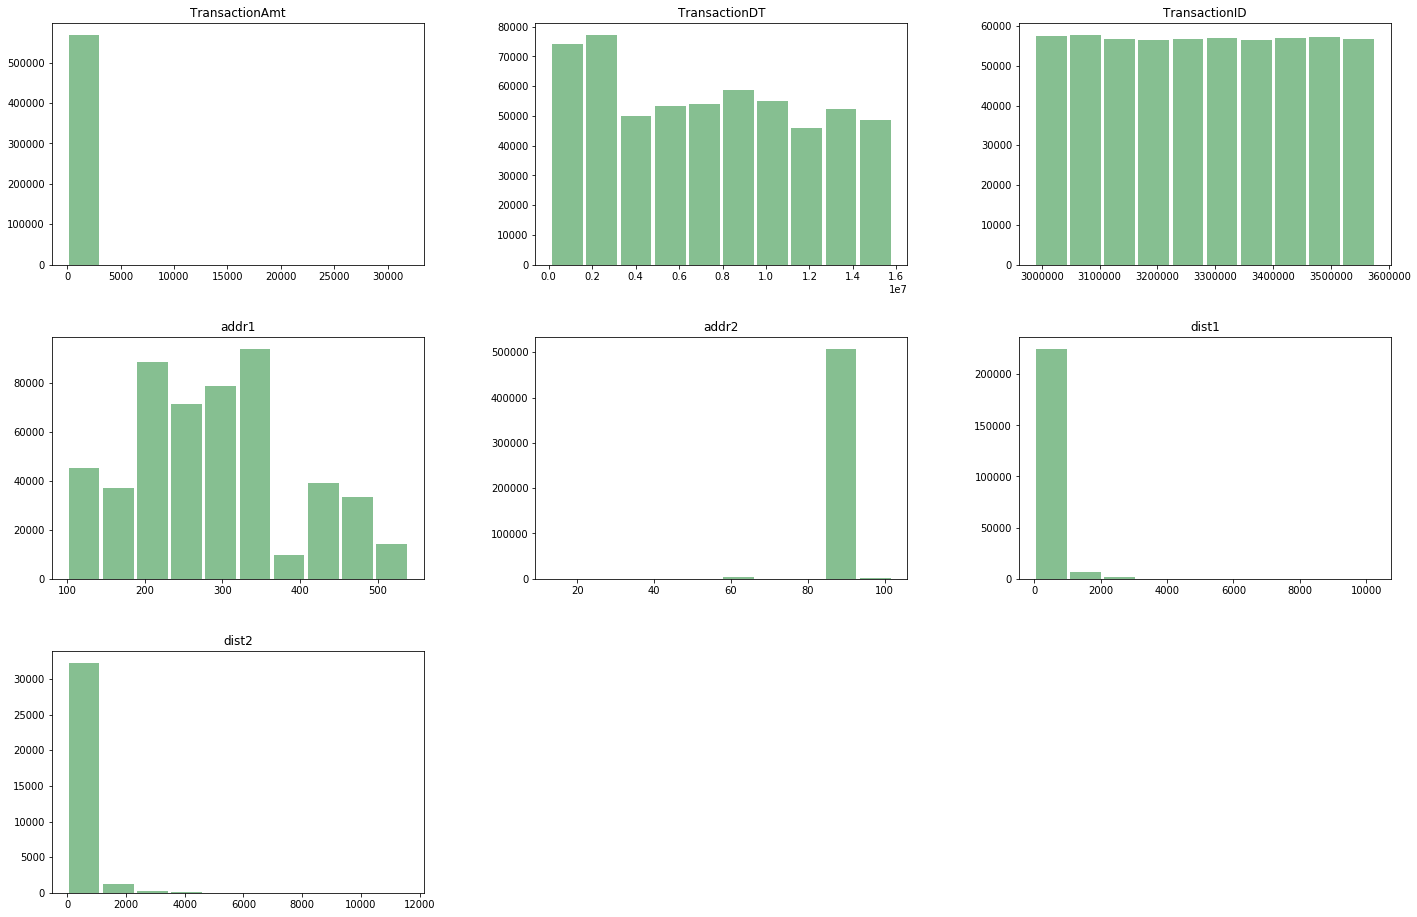

In [11]:
hist0 = trainset[trainset['isFraud'] == False][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].hist(grid=False, figsize=(24,16), color='#86bf91', zorder=2, rwidth=0.9)

In [12]:
trainset[trainset['isFraud'] == False][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].describe()

,TransactionID,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,5.698770e+05,5.698770e+05,569877.000000,511912.000000,511912.000000,233514.000000,33896.000000
mean,3.281810e+06,7.360791e+06,134.511665,290.643341,86.813620,117.360098,235.199758
std,1.707548e+05,4.623930e+06,239.395078,101.692564,2.607742,370.641879,536.798492
min,2.987000e+06,8.640000e+04,0.251000,100.000000,13.000000,0.000000,0.000000
25%,3.133317e+06,3.010651e+06,43.970000,204.000000,87.000000,3.000000,7.000000
50%,3.281808e+06,7.271678e+06,68.500000,299.000000,87.000000,8.000000,36.000000
75%,3.429974e+06,1.125334e+07,120.000000,330.000000,87.000000,24.000000,206.000000
max,3.577539e+06,1.581113e+07,31937.391000,540.000000,102.000000,10286.000000,11623.000000


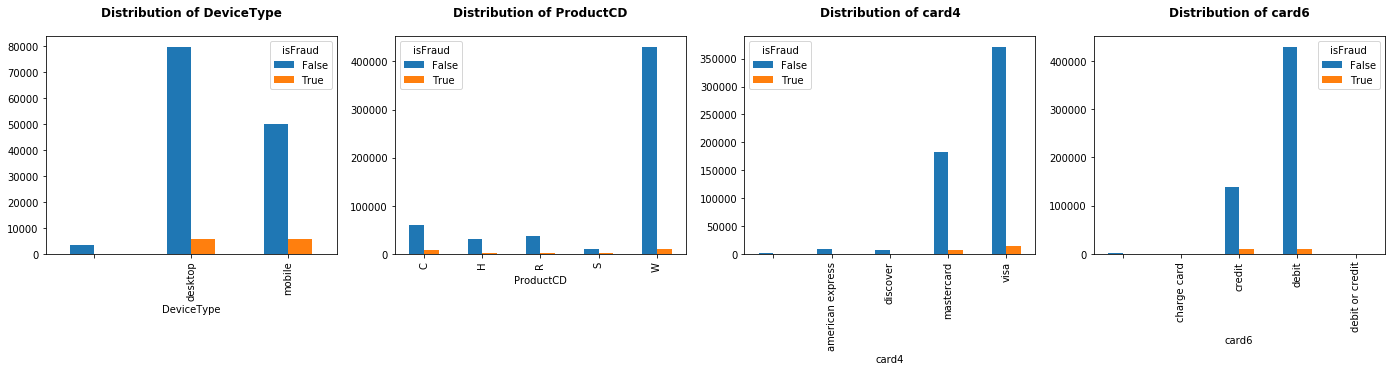

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

for i, column in enumerate(["DeviceType","ProductCD","card4","card6"]):
    pd.crosstab(trainset[column], trainset.isFraud).plot(kind='bar', ax=axes[i])
    axes[i].set_title("Distribution of " + column, pad=20, fontweight='bold', fontsize=12)

In [14]:
trainset.groupby('isFraud')['DeviceInfo'].value_counts()

isFraud  DeviceInfo                    
False    Windows                           44601
                                           22856
         iOS Device                        18542
         MacOS                             12295
         Trident/7.0                        7344
         rv:11.0                            1825
         rv:57.0                             859
         SM-J700M Build/MMB29K               489
         SM-G610M Build/MMB29K               424
         SM-G531H Build/LMY48B               377
         rv:59.0                             318
         SM-G532M Build/MMB29T               304
         SM-G935F Build/NRD90M               303
         SM-G955U Build/NRD90M               295
         ALE-L23 Build/HuaweiALE-L23         283
         SM-G930V Build/NRD90M               274
         SM-G950U Build/NRD90M               274
         rv:52.0                             244
         SAMSUNG                             230
         rv:58.0             

Question 2
----------

In [15]:
most_freq_country_code = trainset['addr2'].value_counts().idxmax()
addr2_set = trainset[trainset['addr2'] == most_freq_country_code]

In [16]:
addr2_set['TransactionDT'][60000:60005]

67055    1528548
67056    1528563
67057    1528580
67058    1528587
67059    1528589
Name: TransactionDT, dtype: int32

In [17]:
addr2_set.iloc[60000:60005]

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,TransactionDT_day,TransactionDT_hour,TransactionDT_min,TransactionDT_sec
67055,3054055,mobile,iOS Device,1528548,150.00,H,mastercard,credit,gmail.com,gmail.com,126.0,87.0,NaN,NaN,False,17,16,35,48
67056,3054056,NaN,NaN,1528563,107.95,W,discover,credit,hotmail.com,,436.0,87.0,2.0,NaN,False,17,16,36,2
67057,3054057,NaN,NaN,1528580,94.95,W,mastercard,debit,aol.com,,315.0,87.0,NaN,NaN,False,17,16,36,19
67058,3054058,NaN,NaN,1528587,29.00,W,mastercard,debit,gmail.com,,269.0,87.0,1.0,NaN,False,17,16,36,26
67059,3054059,NaN,NaN,1528589,261.95,W,mastercard,debit,verizon.net,,494.0,87.0,1.0,NaN,False,17,16,36,28


Text(0, 0.5, 'Number of Transactions')

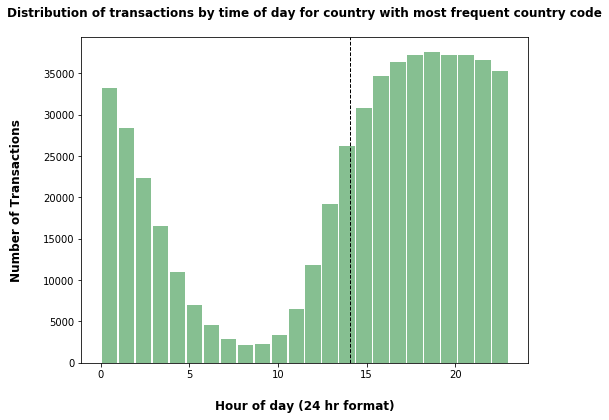

In [18]:
hist1 = addr2_set['TransactionDT_hour'].hist(bins=24, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
hist1.axvline(addr2_set['TransactionDT_hour'].mean(), color='k', linestyle='dashed', linewidth=1)

hist1.set_title("Distribution of transactions by time of day for country with most frequent country code", pad=20, fontweight='bold', fontsize=12)

hist1.set_xlabel("Hour of day (24 hr format)", labelpad=20, weight='bold', size=12)
hist1.set_ylabel("Number of Transactions", labelpad=20, weight='bold', size=12)

Question 3
----------

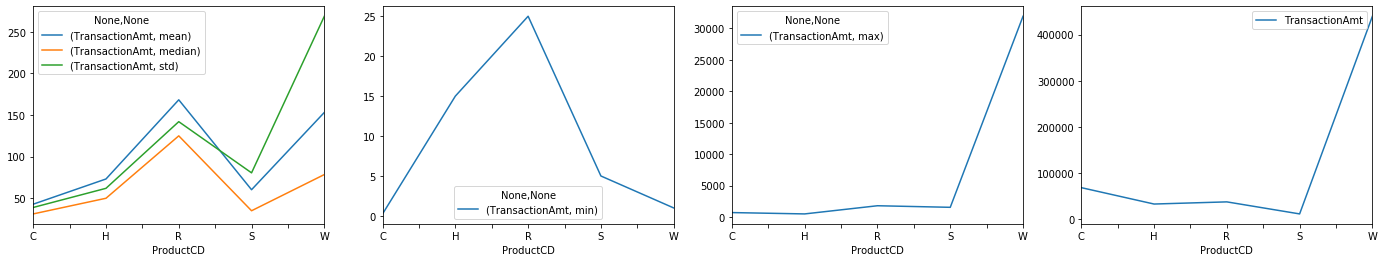

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))
trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([np.mean, np.median, np.std]).plot(ax=axes[0])

trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([min]).plot(ax=axes[1])

trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([max]).plot(ax=axes[2])

trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).count().plot(ax=axes[3])

Question 4
----------

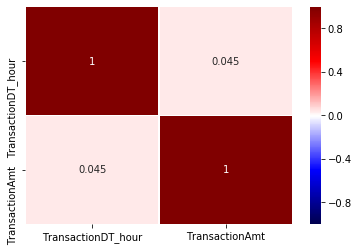

In [20]:
sns.heatmap(trainset[['TransactionDT_hour', 'TransactionAmt']].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True)

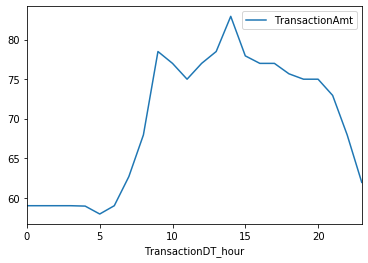

In [21]:
trainset[['TransactionDT_hour', 'TransactionAmt']].groupby(['TransactionDT_hour']).median().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7995f82ba8>]],
      dtype=object)

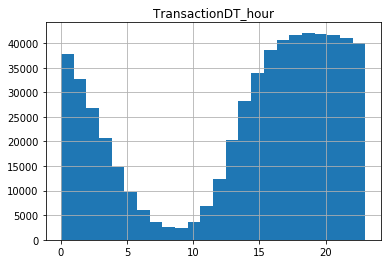

In [22]:
trainset[['TransactionDT_hour']].hist(bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79742b4c18>]],
      dtype=object)

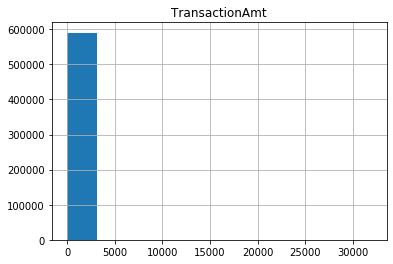

In [23]:
trainset[['TransactionAmt']].hist()

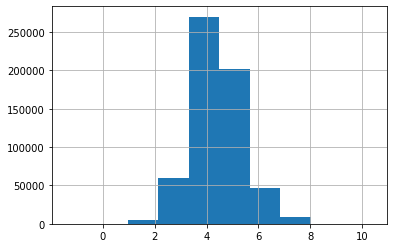

In [24]:
np.log(trainset['TransactionAmt']).hist()

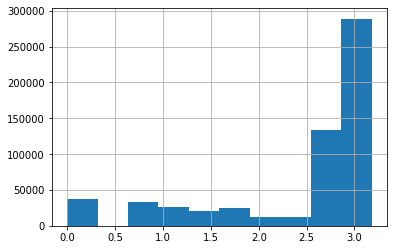

In [25]:
np.log(1 + trainset['TransactionDT_hour']).hist()

Question 5
----------

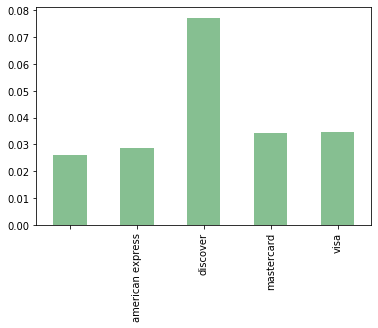

In [26]:
(trainset[trainset['isFraud'] == True]['card4'].value_counts()/trainset['card4'].value_counts()).plot(kind='bar', color='#86bf91')

In [27]:
trainset[trainset['isFraud'] == True].shape[0]/trainset.shape[0]

0.03499000914417313

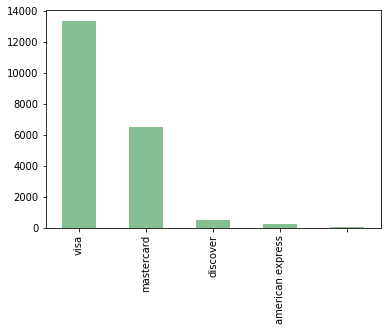

In [28]:
trainset[trainset['isFraud'] == True]['card4'].value_counts().plot(kind='bar', color='#86bf91')

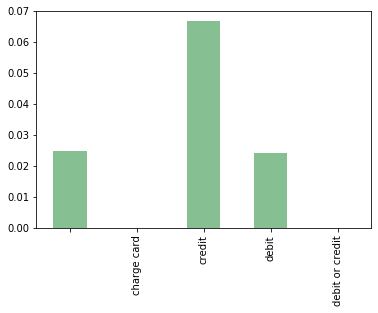

In [29]:
(trainset[trainset['isFraud'] == True]['card6'].value_counts()/trainset['card6'].value_counts()).plot(kind='bar', color='#86bf91')

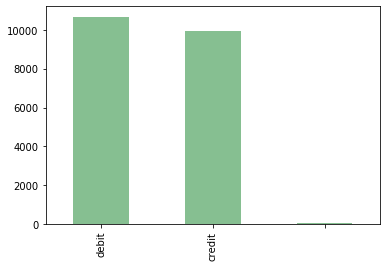

In [30]:
trainset[trainset['isFraud'] == True]['card6'].value_counts().plot(kind='bar', color='#86bf91')

Question 6
----------

### Data Cleaning

In [31]:
# Create a copy of trainset for easy resetting
dataset = trainset.copy()

In [32]:
# Replace columns that have empty value with 'unknown' value
cols = ['card4', 'card6', 'DeviceType', 'DeviceInfo', 'P_emaildomain', 'R_emaildomain']
dataset[cols] = dataset[cols].replace({'': 'unknown'})

In [33]:
# Keep the top 5 column values and group remaining ones into 'Others'
top5_deviceinfo = set(dataset['DeviceInfo'].value_counts()[:5].index)
dataset['DeviceInfo'] = dataset['DeviceInfo'].apply(lambda x: x if x in top5_deviceinfo else 'Others')

In [34]:
# Group categories that are similar into one category [4]
regex_patterns = {
    r'^frontier.*$': 'frontier.com',
    r'^gmail.*$': 'gmail.com',
    r'^hotmail.*$': 'hotmail.com',
    r'^live.*$': 'live.com',
    r'^netzero.*$': 'netzero.com',
    r'^outlook.*$': 'outlook.com',
    r'^yahoo.*$': 'yahoo.com'
}
replacements = {
    'P_emaildomain': regex_patterns,
    'R_emaildomain': regex_patterns
}

dataset.replace(replacements, regex=True, inplace=True)

### Preprocessing
Use sine and cosine for time of the day as these are [$cyclical features^{[3]}$](#References)

In [42]:
dataset['hr_sin'] = np.sin((dataset['TransactionDT_hour'] + dataset['TransactionDT_min']/60.0)*(np.pi/12.0))
dataset['hr_cos'] = np.cos((dataset['TransactionDT_hour'] + dataset['TransactionDT_min']/60.0)*(np.pi/12.0))
dataset['TransactionAmt_lg'] = np.log(dataset['TransactionAmt'])

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
dataset['TransactionAmt_scaled'] = rob_scaler.fit_transform(dataset['TransactionAmt'].values.reshape(-1,1))

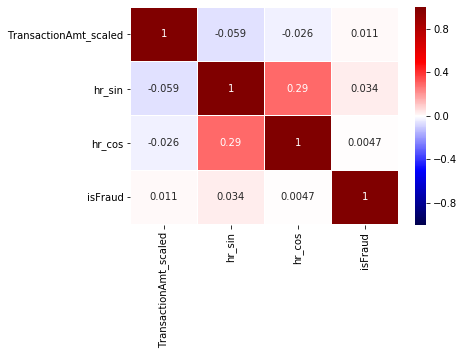

In [44]:
sns.heatmap(dataset[['TransactionAmt_scaled', 'hr_sin', 'hr_cos', 'isFraud']].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True)

In [37]:
categorical_cols = ['DeviceType', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain']
ohe = pd.get_dummies(dataset[categorical_cols])
dataset = dataset.join(ohe)

In [38]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib

In [45]:
train_cols = ["TransactionAmt_scaled","hr_sin","hr_cos"] + list(ohe.columns)
X, y = dataset[train_cols], dataset['isFraud']

In [63]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=0, sampling_strategy=1.0)

X_resampled, y_resampled = sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [66]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=0, sampling_strategy=1.0)

X_resampled, y_resampled = sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [46]:
clf = LogisticRegression(solver='lbfgs', max_iter=4000)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.67      0.76      0.71      4174
        True       0.71      0.62      0.66      4092

    accuracy                           0.69      8266
   macro avg       0.69      0.69      0.69      8266
weighted avg       0.69      0.69      0.69      8266



In [47]:
clf = LogisticRegression(solver='lbfgs', max_iter=4000)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.68      0.77      0.72    114288
        True       0.73      0.63      0.68    113663

    accuracy                           0.70    227951
   macro avg       0.70      0.70      0.70    227951
weighted avg       0.70      0.70      0.70    227951



In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

clf = LinearSVC(dual=False)
clf.fit(X_train, y_train.ravel())

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.66      0.79      0.72      4099
        True       0.75      0.61      0.67      4167

    accuracy                           0.70      8266
   macro avg       0.71      0.70      0.70      8266
weighted avg       0.71      0.70      0.70      8266



In [64]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.68      0.79      0.73      4106
        True       0.75      0.64      0.69      4160

    accuracy                           0.71      8266
   macro avg       0.72      0.71      0.71      8266
weighted avg       0.72      0.71      0.71      8266



In [68]:
from xgboost import XGBClassifier

clf = XGBClassifier(nthread = -1)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.69      0.79      0.74    113896
        True       0.76      0.65      0.70    114055

    accuracy                           0.72    227951
   macro avg       0.73      0.72      0.72    227951
weighted avg       0.73      0.72      0.72    227951



In [69]:
joblib.dump(clf, 'rs_smote_xgb.pkl')

['rs_smote_xgb.pkl']

In [70]:
train_cols

['TransactionAmt_scaled',
 'hr_sin',
 'hr_cos',
 'DeviceType_desktop',
 'DeviceType_mobile',
 'DeviceType_unknown',
 'ProductCD_C',
 'ProductCD_H',
 'ProductCD_R',
 'ProductCD_S',
 'ProductCD_W',
 'card4_american express',
 'card4_discover',
 'card4_mastercard',
 'card4_unknown',
 'card4_visa',
 'card6_charge card',
 'card6_credit',
 'card6_debit',
 'card6_debit or credit',
 'card6_unknown',
 'P_emaildomain_aim.com',
 'P_emaildomain_anonymous.com',
 'P_emaildomain_aol.com',
 'P_emaildomain_att.net',
 'P_emaildomain_bellsouth.net',
 'P_emaildomain_cableone.net',
 'P_emaildomain_centurylink.net',
 'P_emaildomain_cfl.rr.com',
 'P_emaildomain_charter.net',
 'P_emaildomain_comcast.net',
 'P_emaildomain_cox.net',
 'P_emaildomain_earthlink.net',
 'P_emaildomain_embarqmail.com',
 'P_emaildomain_frontier.com',
 'P_emaildomain_gmail.com',
 'P_emaildomain_gmx.de',
 'P_emaildomain_hotmail.com',
 'P_emaildomain_icloud.com',
 'P_emaildomain_juno.com',
 'P_emaildomain_live.com',
 'P_emaildomain_mac.c

References
----------

1. histograms - https://mode.com/example-gallery/python_histogram/  
1. logistic regression - https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8  
1. cyclical features - http://blog.davidkaleko.com/feature-engineering-cyclical-features.html  
1. data cleaning - https://docs.google.com/presentation/d/12Oqzl6aqFtCncrZlUO-82prtiofQt46q-79gzb_nTEA/edit#slide=id.g1187521ab4_0_125
1. undersampling - https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8
1. oversampling - https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879
1. saving a model - https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/